In [34]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [35]:
import pandas as pd
import numpy as np

In [36]:
df=pd.read_csv("/content/drive/MyDrive/Cardiovascular/train.csv")
df_test=pd.read_csv("/content/drive/MyDrive/Cardiovascular/test.csv")

In [37]:
df

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3385,3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0


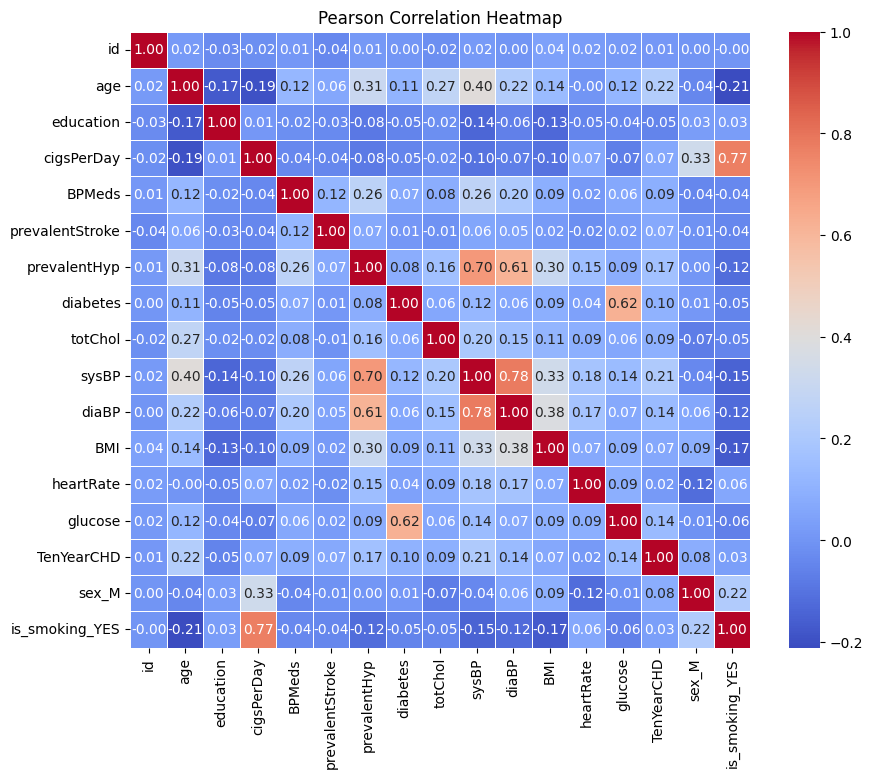

In [38]:

import matplotlib.pyplot as plt
import pandas as pd

# Assuming df is your DataFrame containing your data

# Remove non-numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# One-hot encode categorical variables
categorical_columns = df.select_dtypes(include=['object']).columns
encoded_df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Calculate correlation
pearson_corr = encoded_df.corr(method='pearson')

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(pearson_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Pearson Correlation Heatmap')
plt.show()


In [39]:
df.drop("id",axis=1,inplace=True)
df_test.drop("id",axis=1,inplace=True)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3390 non-null   int64  
 1   education        3303 non-null   float64
 2   sex              3390 non-null   object 
 3   is_smoking       3390 non-null   object 
 4   cigsPerDay       3368 non-null   float64
 5   BPMeds           3346 non-null   float64
 6   prevalentStroke  3390 non-null   int64  
 7   prevalentHyp     3390 non-null   int64  
 8   diabetes         3390 non-null   int64  
 9   totChol          3352 non-null   float64
 10  sysBP            3390 non-null   float64
 11  diaBP            3390 non-null   float64
 12  BMI              3376 non-null   float64
 13  heartRate        3389 non-null   float64
 14  glucose          3086 non-null   float64
 15  TenYearCHD       3390 non-null   int64  
dtypes: float64(9), int64(5), object(2)
memory usage: 423.9+ KB


In [41]:
df.describe()

,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


In [42]:
df['is_smoking'].replace({'YES': 1, 'NO': 0}, inplace=True)
df["sex"].replace({'F': 1, 'M': 0}, inplace=True)
mode_values = df.mode().iloc[0]
df = df.fillna(mode_values)
df_test['is_smoking'].replace({'YES': 1, 'NO': 0}, inplace=True)
df_test["sex"].replace({'F': 1, 'M': 0}, inplace=True)
mode_values = df_test.mode().iloc[0]
df_test = df_test.fillna(mode_values)

In [43]:
df.head(3)

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,64,2.0,1,1,3.0,0.0,0,0,0,221.0,148.0,85.0,22.91,90.0,80.0,1
1,36,4.0,0,0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,1.0,1,1,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0


In [44]:
df.columns[0]

'age'

In [45]:
df.shape

(3390, 16)

In [46]:
df.drop(["age","sex"],axis=1)

,education,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,2.0,1,3.0,0.0,0,0,0,221.0,148.0,85.0,22.91,90.0,80.0,1
1,4.0,0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,1.0,1,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,1.0,1,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,1.0,1,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3385,1.0,0,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,1.0,0,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3.0,1,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,1.0,0,0.0,0.0,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0


In [47]:
for _ in df.drop(["sex","is_smoking","BPMeds","prevalentStroke","prevalentHyp","diabetes"], axis = 1).columns:
  df[_] = df[_]/df[_].max()
for _ in df_test.drop(["sex","is_smoking","BPMeds","prevalentStroke","prevalentHyp","diabetes"], axis = 1).columns:
  df_test[_] = df_test[_]/df_test[_].max()

In [48]:
df

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0.914286,0.50,1,1,0.042857,0.0,0,0,0,0.317529,0.501695,0.596491,0.403345,0.629371,0.203046,1.0
1,0.514286,1.00,0,0,0.000000,0.0,0,1,0,0.304598,0.569492,0.687719,0.524120,0.503497,0.190355,0.0
2,0.657143,0.25,1,1,0.142857,0.0,0,0,0,0.359195,0.393220,0.498246,0.358275,0.615385,0.238579,0.0
3,0.714286,0.25,0,1,0.285714,0.0,0,1,0,0.334770,0.535593,0.617544,0.497535,0.475524,0.238579,1.0
4,0.914286,0.25,1,1,0.428571,0.0,0,0,0,0.346264,0.462712,0.596491,0.465141,0.489510,0.195431,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3385,0.857143,0.25,1,0,0.000000,0.0,0,0,0,0.375000,0.418644,0.554386,0.515493,0.489510,0.261421,0.0
3386,0.657143,0.25,1,0,0.000000,0.0,0,0,0,0.285920,0.345763,0.392982,0.386620,0.559441,0.213198,0.0
3387,0.628571,0.75,0,1,0.042857,0.0,0,1,0,0.505747,0.555932,0.835088,0.509155,0.510490,0.182741,1.0
3388,0.857143,0.25,0,0,0.000000,0.0,0,1,0,0.274425,0.566102,0.736842,0.405106,0.559441,0.215736,0.0


In [49]:
df.describe()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000
mean,0.707745,0.486504,0.567257,0.497640,0.128723,0.029499,0.006490,0.315339,0.025664,0.340671,0.449496,0.581635,0.453927,0.531308,0.206729,0.150737
std,0.122755,0.254392,0.495529,0.500068,0.169469,0.169224,0.080309,0.464719,0.158153,0.064647,0.075566,0.084376,0.072379,0.083707,0.058935,0.357846
min,0.457143,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.153736,0.283051,0.336842,0.280986,0.314685,0.101523,0.000000
25%,0.600000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.295977,0.396610,0.522807,0.404445,0.475524,0.182741,0.000000
50%,0.700000,0.500000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.337644,0.435593,0.575439,0.446567,0.524476,0.195431,0.000000
75%,0.800000,0.750000,1.000000,1.000000,0.285714,0.000000,0.000000,1.000000,0.000000,0.379310,0.488136,0.631579,0.492914,0.580420,0.215736,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [50]:
df.corr()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
age,1.000000,-0.170614,0.041882,-0.210997,-0.191465,0.122114,0.059038,0.308826,0.107875,0.272431,0.404845,0.221896,0.136363,-0.002636,0.113058,0.224927
education,-0.170614,1.000000,-0.025275,0.030193,0.014078,-0.019880,-0.031820,-0.081925,-0.051895,-0.021412,-0.132202,-0.060774,-0.135431,-0.039395,-0.040193,-0.051388
sex,0.041882,-0.025275,1.000000,-0.215485,-0.329308,0.043191,0.011273,-0.003072,-0.008853,0.071109,0.037369,-0.058840,-0.087385,0.118707,-0.000111,-0.084647
is_smoking,-0.210997,0.030193,-0.215485,1.000000,0.763273,-0.037533,-0.043703,-0.119325,-0.053333,-0.046603,-0.145721,-0.124318,-0.172547,0.062152,-0.059714,0.034143
cigsPerDay,-0.191465,0.014078,-0.329308,0.763273,1.000000,-0.035727,-0.041576,-0.078003,-0.048114,-0.025036,-0.100348,-0.068320,-0.099474,0.066229,-0.066279,0.068020
BPMeds,0.122114,-0.019880,0.043191,-0.037533,-0.035727,1.000000,0.116183,0.256892,0.070932,0.081355,0.260384,0.198780,0.087994,0.018107,0.061193,0.087349
prevalentStroke,0.059038,-0.031820,0.011273,-0.043703,-0.041576,0.116183,1.000000,0.071652,0.010115,-0.010890,0.057568,0.047235,0.012801,-0.019183,0.024064,0.068627
prevalentHyp,0.308826,-0.081925,-0.003072,-0.119325,-0.078003,0.256892,0.071652,1.000000,0.082565,0.158779,0.699285,0.612897,0.298712,0.150731,0.082986,0.166544
diabetes,0.107875,-0.051895,-0.008853,-0.053333,-0.048114,0.070932,0.010115,0.082565,1.000000,0.058952,0.124011,0.061165,0.085866,0.039746,0.609351,0.103681
totChol,0.272431,-0.021412,0.071109,-0.046603,-0.025036,0.081355,-0.010890,0.158779,0.058952,1.000000,0.198005,0.153819,0.114373,0.087208,0.061132,0.093745


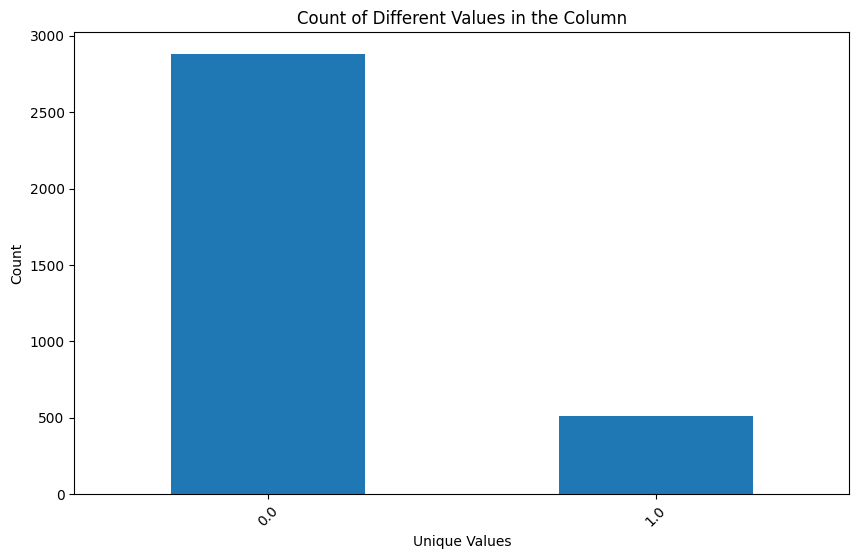

In [51]:
import matplotlib.pyplot as plt

# Assuming 'column' is your column of interest
# You can replace 'column' with the actual name of your column
column_values = df['TenYearCHD'].value_counts()

# Plotting the bar graph
plt.figure(figsize=(10, 6))
column_values.plot(kind='bar')
plt.title('Count of Different Values in the Column')
plt.xlabel('Unique Values')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [52]:
from sklearn.model_selection import train_test_split
import pandas as pd
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [53]:
X_train.shape

(2373, 15)

In [54]:
y_train

array([0., 0., 0., ..., 0., 0., 0.])

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
# Create a logistic regression model with specified parameters
model2 = RandomForestClassifier(n_estimators=10)

In [56]:
model2.fit(X_test, y_test)

RandomForestClassifier(n_estimators=10)

In [57]:
n = model2.predict(X_test)

In [58]:
n

array([0., 0., 0., ..., 0., 0., 0.])

In [59]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, n)

0.9803343166175025

In [60]:
y_pred=pd.DataFrame(n)
y_pred.replace({1: "YES", 0: "NO"}, inplace=True)

In [61]:
y_pred

,0
0,NO
1,NO
2,NO
3,NO
4,NO
...,...
1012,NO
1013,NO
1014,NO
1015,NO


In [66]:
test = [0.62857143, 1.        , 0.        , 4.        , 0.28571429,
       0.        , 0.        , 1.        , 0.        , 0.33045977,
       0.46779661, 0.6877193 , 0.44225352, 0.52447552, 0.23604061]

In [67]:
n=model2.predict(np.array(test).reshape(1,-1))

In [68]:
y_pred=pd.DataFrame(n)
y_pred.replace({1: "YES", 0: "NO"}, inplace=True)

In [69]:
np.array(y_pred)[0][0]

'NO'

In [70]:
if(test[3] < 3):
    print("You are at lower risk")
else :
    print("You are at higher risk")


You are at higher risk
